In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv("loan_data.csv")

.head() prints the 1st five rows of the dataframe

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* Credit History ---> 1 Represents good history
                 0 Represents bad history
*

.tail() prints the last five rows of the dataframe

In [6]:
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


.shape ---> result in rows and colums

In [10]:
loan_dataset.shape

(614, 13)

In [11]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


.isna() and isnull() provide the null values in data

In [7]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan_dataset = loan_dataset.dropna()

In [13]:
loan_dataset.shape

(480, 13)

In [14]:
loan_dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoding

* Changing Loan status values by 0 and 1 instead of Y and N,
      Where N:0 and Y:1

In [15]:
# LOAN STATUS COLUMN

loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5812\3468370535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)


In [16]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [18]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


In [19]:
loan_dataset["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

We have to remove this 3+ value as it is not good for any model to comprehend

Replacing 3+ to 4 ---> for this data and instance only you can replace it with 5 or any other integer

In [21]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [22]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visulization

In [26]:
sns.set_theme()

<AxesSubplot:xlabel='Education', ylabel='count'>

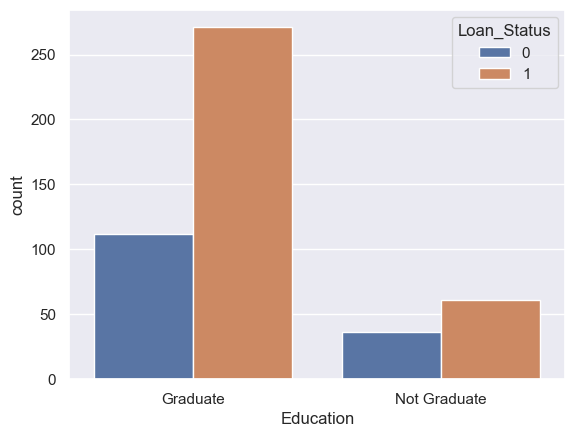

In [28]:
# Education with loan status
sns.countplot(x='Education', hue="Loan_Status", data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

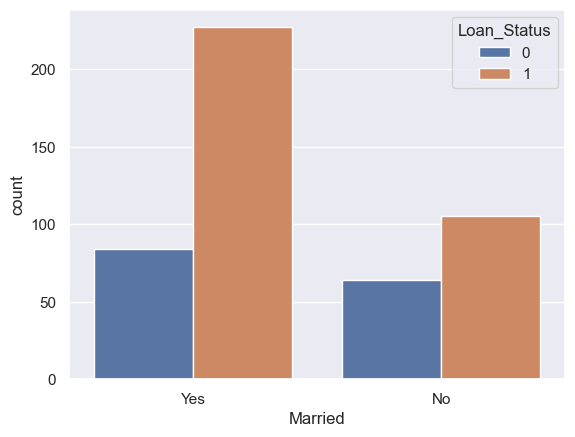

In [29]:
# marital status with loan status

sns.countplot(x='Married', hue="Loan_Status", data=loan_dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

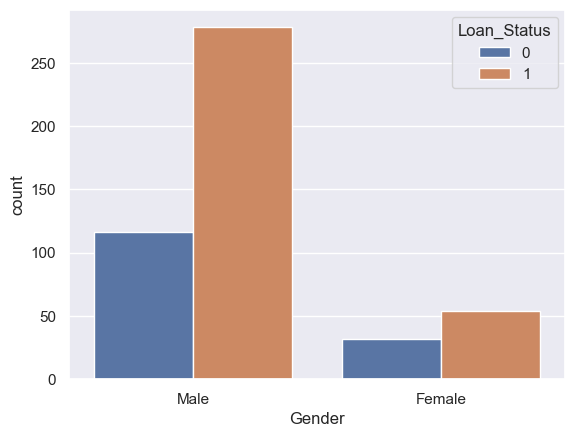

In [30]:
# Gender with loan status

sns.countplot(x='Gender', hue="Loan_Status", data=loan_dataset)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

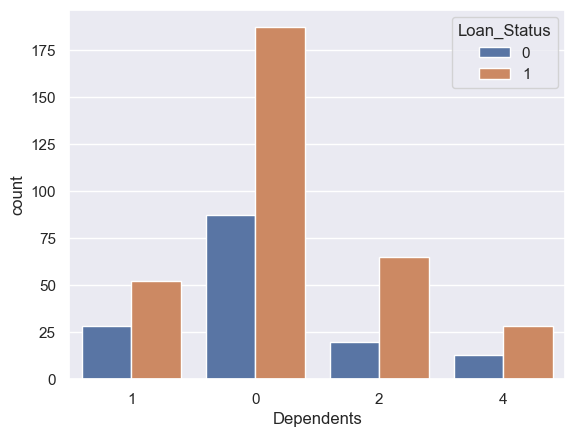

In [32]:
# Gender with loan status

sns.countplot(x='Dependents', hue="Loan_Status", data=loan_dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

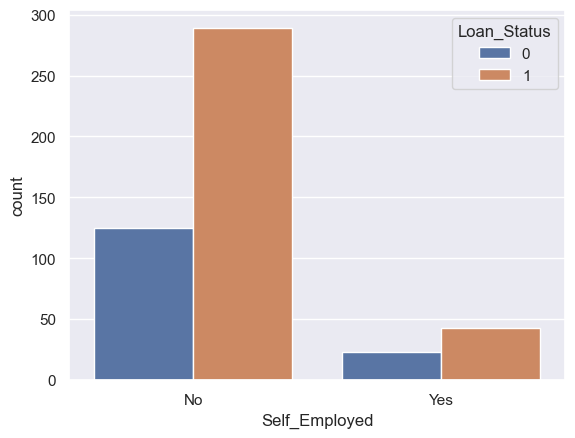

In [33]:
# Gender with loan status

sns.countplot(x='Self_Employed', hue="Loan_Status", data=loan_dataset)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

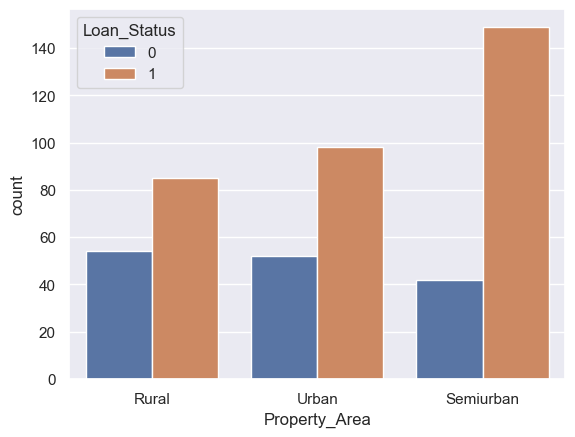

In [34]:
# Gender with loan status

sns.countplot(x='Property_Area', hue="Loan_Status", data=loan_dataset)

In [36]:
# Coverting all categorical data to numercal data

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [37]:
loan_dataset.replace({"Married":{'No':0, 'Yes':1}}, inplace=True)

We can update multiple columns at same time

In [38]:
loan_dataset.replace({"Gender":{'Male':1, 'Female':0}, "Self_Employed":{"No":0,"Yes":1},
                     "Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,"Not Graduate":0}}, inplace=True)

In [39]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [40]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


Sepatating Data and Labels

In [41]:
X = loan_dataset.drop(columns=["Loan_ID",'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

In [42]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [43]:
print(X.shape, Y.shape)

(480, 11) (480,)


Spliting Data into Training and Test Data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify = Y, random_state=2)

In [45]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(432, 11) (48, 11) (432,) (48,)


# TRAINIANG THE MODEL
     SUPPORT VECTOR MACHINE MODEL (SVM)
     SVC ---> Support vector classifier

In [46]:
classifier = svm.SVC(kernel='linear')

In [48]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

MODEL EVALUATION

In [49]:
# Accuracy Score

In [51]:
X_train_prediction = classifier.predict(X_train)

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print(training_data_accuracy)

0.7986111111111112


In [52]:
print("The Accuracy of Training Data is: ", training_data_accuracy*100, "%")

The Accuracy of Training Data is:  79.86111111111111 %


In [53]:
X_test_prediction = classifier.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(test_data_accuracy)

0.8333333333333334


In [54]:
print("The Accuracy of Training Data is: ", test_data_accuracy*100, "%")

The Accuracy of Training Data is:  83.33333333333334 %
